In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Загрузка исходных данных из файла parquet
data_cleaned = pd.read_parquet('data/data_cleaned.parquet')
data_cleaned['Год'] = pd.to_numeric(data_cleaned['Год'], errors='coerce')

columns_to_drop = [       
  ' Выручка, RUB',
' Краткосрочные обязательства, RUB', ' Кредиторская задолженность, RUB',
' Нераспределенная прибыль (непокрытый убыток), RUB',
' Себестоимость продаж, RUB', ' Собственный оборотный капитал, RUB',' Активы  всего, RUB'
]
data_cleaned = data_cleaned.drop(columns=columns_to_drop)


# Список столбцов, для которых нужно рассчитать изменения в процентах за последний год
columns_to_calculate = [' Cooтношение дебиторской задолженности к активам компании, %',
       ' Доля рабочего капитала в активах компании, %',
       ' Коэффициент абсолютной ликвидности, %',
       ' Коэффициент быстрой ликвидности, %',
       ' Коэффициент обеспеченности собственными оборотными средствами, %',
       ' Коэффициент оборачиваемости совокупных активов, %',
       ' Коэффициент соотношения заемных и собственных средств, %',
       ' Коэффициент текущей ликвидности, %',
       ' Период оборота активов, дни', ' Период оборота запасов, дни',
       ' Период оборота основных средств, дни',
       ' Период погашения дебиторской задолженности, дни',
       ' Период погашения кредиторской задолженности, дни',
       ' Рентабельность активов (ROA), %', ' Рентабельность затрат, %',
       ' Рентабельность капитала (ROE), %', ' Рентабельность продаж, %',
       ' Соотношение чистого долга к капиталу, %']

# Выбор последних двух годов для каждой компании
last_years_data = data_cleaned.groupby('Наименование').apply(lambda x: x.nlargest(2, 'Год')).reset_index(drop=True)

def calculate_percentage_change(df, columns, years):
    if len(df) < years:
        return pd.Series([float('NaN')] * len(columns), index=columns)
    changes = (df.iloc[years-1][columns] - df.iloc[0][columns]) / df.iloc[0][columns] * 100
    return changes

# Вычисление изменений в процентах за последние 2 и 3 года для указанных столбцов
last_2_years_changes = data_cleaned.groupby('Наименование').apply(calculate_percentage_change, columns=columns_to_calculate, years=2)
last_3_years_changes = data_cleaned.groupby('Наименование').apply(calculate_percentage_change, columns=columns_to_calculate, years=3)
last_4_years_changes = data_cleaned.groupby('Наименование').apply(calculate_percentage_change, columns=columns_to_calculate, years=4)

# Замена пропусков на нули
last_2_years_changes = last_2_years_changes.fillna(0)
last_3_years_changes = last_3_years_changes.fillna(0)
last_4_years_changes = last_4_years_changes.fillna(0)
# Переименование столбцов
last_2_years_changes.columns = [col + '_change_last_2_years' for col in last_2_years_changes.columns]
last_3_years_changes.columns = [col + '_change_last_3_years' for col in last_3_years_changes.columns]
last_4_years_changes.columns = [col + '_change_last_4_years' for col in last_4_years_changes.columns]


# Объединение информации об изменениях с исходным датафреймом
data_cleaned = pd.merge(data_cleaned, last_2_years_changes, on='Наименование', how='left')
data_cleaned = pd.merge(data_cleaned, last_3_years_changes, on='Наименование', how='left')
data_cleaned = pd.merge(data_cleaned, last_4_years_changes, on='Наименование', how='left')
# Вывод результата
data_cleaned


,index,Наименование,Регистрационный номер,Адрес (место нахождения),Код налогоплательщика,Регион регистрации,Вид деятельности/отрасль,Важная информация,Мои списки,Дата иска,...,"Период оборота активов, дни_change_last_4_years","Период оборота запасов, дни_change_last_4_years","Период оборота основных средств, дни_change_last_4_years","Период погашения дебиторской задолженности, дни_change_last_4_years","Период погашения кредиторской задолженности, дни_change_last_4_years","Рентабельность активов (ROA), %_change_last_4_years","Рентабельность затрат, %_change_last_4_years","Рентабельность капитала (ROE), %_change_last_4_years","Рентабельность продаж, %_change_last_4_years","Соотношение чистого долга к капиталу, %_change_last_4_years"
0,0,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,12,"1015 УСМР, АО",1.027739e+12,"143003, Московская обл, Одинцово г, г.о. Одинц...",7.734009e+09,Московская область,Строительство жилых и нежилых зданий,\nЕсть заявление в суд о банкротстве (13.07.20...,"""STR""",2017-01-24,...,7.526882,300.0,500.000000,129.090909,-1.338238,108.333333,-1.234568,129.556650,-1.234568,-85.682551
4,13,"1015 УСМР, АО",1.027739e+12,"143003, Московская обл, Одинцово г, г.о. Одинц...",7.734009e+09,Московская область,Строительство жилых и нежилых зданий,\nЕсть заявление в суд о банкротстве (13.07.20...,"""STR""",2017-01-24,...,7.526882,300.0,500.000000,129.090909,-1.338238,108.333333,-1.234568,129.556650,-1.234568,-85.682551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39936,77274,"ЯСУ, ООО",1.137604e+12,"150040, Ярославская обл, г.о. город Ярославль,...",7.604248e+09,Ярославская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,169.000000,12300.0,-87.899543,450.000000,169.021793,-77.857143,-481.142857,-80.977667,-515.697674,92.627509
39937,77276,"ЯСУ, ООО",1.137604e+12,"150040, Ярославская обл, г.о. город Ярославль,...",7.604248e+09,Ярославская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,169.000000,12300.0,-87.899543,450.000000,169.021793,-77.857143,-481.142857,-80.977667,-515.697674,92.627509
39938,77277,"ЯСУ, ООО",1.137604e+12,"150040, Ярославская обл, г.о. город Ярославль,...",7.604248e+09,Ярославская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,169.000000,12300.0,-87.899543,450.000000,169.021793,-77.857143,-481.142857,-80.977667,-515.697674,92.627509
39939,77278,"ЯСУ, ООО",1.137604e+12,"150040, Ярославская обл, г.о. город Ярославль,...",7.604248e+09,Ярославская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,169.000000,12300.0,-87.899543,450.000000,169.021793,-77.857143,-481.142857,-80.977667,-515.697674,92.627509


In [2]:
# Фильтруем данные по категориальной переменной
bankrupt_data = data_cleaned[data_cleaned['Категориальная переменная'] == True]
no_bankrupt_data = data_cleaned[data_cleaned['Категориальная переменная'] == False]

# Приводим столбец 'Год' в тип int для компаний
no_bankrupt_data['Год'] = no_bankrupt_data['Год'].astype(int)
bankrupt_data['Год'] = bankrupt_data['Год'].astype(int)
no_bankrupt_data

/tmp/ipykernel_1933/3286317991.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_bankrupt_data['Год'] = no_bankrupt_data['Год'].astype(int)
/tmp/ipykernel_1933/3286317991.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bankrupt_data['Год'] = bankrupt_data['Год'].astype(int)


,index,Наименование,Регистрационный номер,Адрес (место нахождения),Код налогоплательщика,Регион регистрации,Вид деятельности/отрасль,Важная информация,Мои списки,Дата иска,...,"Период оборота активов, дни_change_last_4_years","Период оборота запасов, дни_change_last_4_years","Период оборота основных средств, дни_change_last_4_years","Период погашения дебиторской задолженности, дни_change_last_4_years","Период погашения кредиторской задолженности, дни_change_last_4_years","Рентабельность активов (ROA), %_change_last_4_years","Рентабельность затрат, %_change_last_4_years","Рентабельность капитала (ROE), %_change_last_4_years","Рентабельность продаж, %_change_last_4_years","Соотношение чистого долга к капиталу, %_change_last_4_years"
0,0,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16,40,"1МСМУ СТАЛЬМОНТАЖ, ООО",1.077760e+12,"129329, г. Москва, вн.тер.г. муниципальный окр...",7.705809e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17,42,"1МСМУ СТАЛЬМОНТАЖ, ООО",1.077760e+12,"129329, г. Москва, вн.тер.г. муниципальный окр...",7.705809e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39936,77274,"ЯСУ, ООО",1.137604e+12,"150040, Ярославская обл, г.о. город Ярославль,...",7.604248e+09,Ярославская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,169.0,12300.0,-87.899543,450.0,169.021793,-77.857143,-481.142857,-80.977667,-515.697674,92.627509
39937,77276,"ЯСУ, ООО",1.137604e+12,"150040, Ярославская обл, г.о. город Ярославль,...",7.604248e+09,Ярославская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,169.0,12300.0,-87.899543,450.0,169.021793,-77.857143,-481.142857,-80.977667,-515.697674,92.627509
39938,77277,"ЯСУ, ООО",1.137604e+12,"150040, Ярославская обл, г.о. город Ярославль,...",7.604248e+09,Ярославская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,169.0,12300.0,-87.899543,450.0,169.021793,-77.857143,-481.142857,-80.977667,-515.697674,92.627509
39939,77278,"ЯСУ, ООО",1.137604e+12,"150040, Ярославская обл, г.о. город Ярославль,...",7.604248e+09,Ярославская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,169.0,12300.0,-87.899543,450.0,169.021793,-77.857143,-481.142857,-80.977667,-515.697674,92.627509


In [3]:
# Вычисляем год иска для компаний, которые банкроты
bankrupt_data['Год иска'] = bankrupt_data['Дата иска'].apply(lambda x: x.year - 2 if x.month > 3 else x.year - 1)

# Фильтруем банкроты по году
filtered_data = bankrupt_data[bankrupt_data['Год'] == bankrupt_data['Год иска']]
filtered_data

/tmp/ipykernel_1933/467618231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bankrupt_data['Год иска'] = bankrupt_data['Дата иска'].apply(lambda x: x.year - 2 if x.month > 3 else x.year - 1)


,index,Наименование,Регистрационный номер,Адрес (место нахождения),Код налогоплательщика,Регион регистрации,Вид деятельности/отрасль,Важная информация,Мои списки,Дата иска,...,"Период оборота запасов, дни_change_last_4_years","Период оборота основных средств, дни_change_last_4_years","Период погашения дебиторской задолженности, дни_change_last_4_years","Период погашения кредиторской задолженности, дни_change_last_4_years","Рентабельность активов (ROA), %_change_last_4_years","Рентабельность затрат, %_change_last_4_years","Рентабельность капитала (ROE), %_change_last_4_years","Рентабельность продаж, %_change_last_4_years","Соотношение чистого долга к капиталу, %_change_last_4_years",Год иска
7,16,"1015 УСМР, АО",1.027739e+12,"143003, Московская обл, Одинцово г, г.о. Одинц...",7.734009e+09,Московская область,Строительство жилых и нежилых зданий,\nЕсть заявление в суд о банкротстве (13.07.20...,"""STR""",2017-01-24,...,3.000000e+02,500.000000,129.090909,-1.338238,108.333333,-1.234568,129.556650,-1.234568,-85.682551,2016
43,80,"2МЕН ГРУПП, АО",1.067746e+12,"625002, Тюменская обл., г. Тюмень, ул. Комсомо...",7.701651e+09,Тюменская область,Строительство жилых и нежилых зданий,\nЕсть заявление в суд о банкротстве (03.08.20...,"""STR""",2019-10-21,...,-3.381087e+01,5063.636364,38.550390,-52.154827,-86.046512,-26.565875,-94.316731,-20.333220,47.508942,2017
77,130,"54, ООО ПМК",1.020203e+12,"450032, Башкортостан Респ, г.о. город Уфа, г У...",2.770551e+08,Башкортостан (Республика),Строительство жилых и нежилых зданий,\n\n\n,"""STR""",2020-10-14,...,5.107527e+01,11.864407,148.076923,45.798529,-602.173913,1320.833333,-1173.043478,1275.000000,-50.692690,2018
101,172,"А КОНСТРАКШН, ООО",1.147847e+12,"197183, г. Санкт-Петербург, вн.тер.г. муниципа...",7.814608e+09,Санкт-Петербург,Строительство жилых и нежилых зданий,\nЕсть заявление в суд о банкротстве (04.02.20...,"""STR""",2020-10-26,...,inf,inf,-57.446809,-14.717310,-33.642578,-63.567251,-2.357574,-59.890486,-96.478914,2018
130,237,"А.С.СТРОЙ, ООО",1.074706e+12,"187330, Ленинградская обл, м.р-н Кировский, г....",4.706027e+09,Ленинградская область,Строительство жилых и нежилых зданий,\n\nНа 09.10.2023 17:02 есть решения ФНС о при...,"""STR""",2017-08-07,...,1.024286e+04,133.333333,771.428571,3784.653465,-95.033712,-41.813602,-83.772455,-39.945652,307.802341,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39839,77085,"ЮТА, ООО СК",1.138617e+12,"628452, Ханты-Мансийский Автономный Округ - Юг...",8.617031e+09,Тюменская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",2021-05-17,...,2.341667e+03,4277.777778,-10.937500,32.658859,-85.321101,-59.345794,-148.324022,-58.851675,-361.826885,2019
39876,77150,"ЯИК, ООО",1.125027e+12,"140011, Московская обл., г. Люберцы, ул. Авиат...",5.027184e+09,Московская область,Строительство жилых и нежилых зданий,Юридическое лицо признано несостоятельным (бан...,"""STR""",2021-06-01,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019
39908,77225,"ЯНТАРЬСЕРВИСБАЛТИК, ООО",1.103925e+12,", Калининградская обл, г.о. город Калининград,...",3.906221e+09,Калининградская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",2017-02-07,...,inf,-100.000000,-3.349282,42.812284,8.108108,1000.000000,-17.906951,911.111111,2550.000000,2016
39917,77236,"ЯРАВТОДОР, ООО",1.147602e+12,"150506, Ярославская обл., Ярославский район, п...",7.602111e+09,Ярославская область,Строительство жилых и нежилых зданий,\nСообщение о признаках банкротства (17.10.202...,"""STR""",2020-11-02,...,1.035000e+04,inf,325.000000,279.450906,-81.386861,182.432432,-91.422647,171.889401,-92.838115,2018


In [4]:
# Сортировка данных по столбцам "наименование" и "год"
sorted_data = no_bankrupt_data.sort_values(by=['Наименование', 'Год'])

# Группировка данных по столбцу "наименование" и выбор последней строки из каждой группы
last_year_data = sorted_data.groupby('Наименование').tail(1)
last_year_data

,index,Наименование,Регистрационный номер,Адрес (место нахождения),Код налогоплательщика,Регион регистрации,Вид деятельности/отрасль,Важная информация,Мои списки,Дата иска,...,"Период оборота активов, дни_change_last_4_years","Период оборота запасов, дни_change_last_4_years","Период оборота основных средств, дни_change_last_4_years","Период погашения дебиторской задолженности, дни_change_last_4_years","Период погашения кредиторской задолженности, дни_change_last_4_years","Рентабельность активов (ROA), %_change_last_4_years","Рентабельность затрат, %_change_last_4_years","Рентабельность капитала (ROE), %_change_last_4_years","Рентабельность продаж, %_change_last_4_years","Соотношение чистого долга к капиталу, %_change_last_4_years"
2,2,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18,43,"1МСМУ СТАЛЬМОНТАЖ, ООО",1.077760e+12,"129329, г. Москва, вн.тер.г. муниципальный окр...",7.705809e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
26,53,"201 УНР, ООО",1.157746e+12,"117630, г. Москва, вн.тер.г. муниципальный окр...",7.719093e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,10.666667,1280.952381,inf,-23.664122,10.806220,206.597222,261.306533,-29.304727,244.102564,-57.403669
37,70,"2М, ООО",1.147328e+12,"432072, Ульяновская обл, г.о. город Ульяновск,...",7.328078e+09,Ульяновская область,Строительство жилых и нежилых зданий,\n\nНа 16.08.2023 10:27 есть решения ФНС о при...,"""STR""",1970-01-01,...,55.737705,-95.503212,inf,787.500000,672.330097,634.010152,337.903226,9.205451,322.131148,-98.144028
49,91,"31 КВАРТАЛ, ООО",1.175050e+12,"141204, Московская обл., г. Пушкино, проезд Пи...",5.038126e+09,Московская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,50.793651,160.396040,4900.000000,-1.960784,29.884608,-20.201294,43.902439,-76.769725,42.500000,-80.222379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39901,77203,"ЯМАЛСТРОЙМЕХАНИЗАЦИЯ, ООО",1.138903e+12,"629757, Ямало-Ненецкий окр., Надымский район, ...",8.903033e+09,Тюменская область,Строительство жилых и нежилых зданий,Юридическое лицо признано несостоятельным (бан...,"""STR""",1970-01-01,...,4117.283951,141279.069767,1099.890830,4089.855072,1820.987157,-136.512209,-214.237907,-300.824468,-860.347870,-96.751075
39905,77219,"ЯНА РАЙНИСА ПЛЮС, ООО",1.167747e+12,"115432, г. Москва, проспект Андропова, д. 18 к...",7.733295e+09,Москва,Строительство жилых и нежилых зданий,Прекратило деятельность при присоединении (09....,"""STR""",1970-01-01,...,-69.997920,-77.890672,-92.307692,-67.747164,418.521446,-78.461538,-1027.187689,-58.706468,-252.208997,-71.676892
39927,77247,"ЯРД-ИНЖИНИРИНГ, ООО",1.167627e+12,"150030, Ярославская обл., г. Ярославль, проспе...",7.604300e+09,Ярославская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,410.126582,363.194444,inf,235.294118,446.001559,-84.281945,-36.432161,-83.372016,-34.599729,-95.140187
39933,77259,"ЯРОСЛАВСКИЙ ДСК, ООО",1.137602e+12,"150044, Ярославская обл., г. Ярославль, ул. Пр...",7.602096e+09,Ярославская область,Строительство жилых и нежилых зданий,Юридическое лицо признано несостоятельным (бан...,"""STR""",1970-01-01,...,-46.645367,925.000000,-62.145390,-62.845850,-53.704582,-212.765957,172.500000,-111.144578,166.242038,-340.390161


In [5]:
no_matched_data = pd.concat([last_year_data, filtered_data], ignore_index=True)

no_matched_data.to_parquet('data/no_matched_data.parquet')

# Save the matching_data DataFrame as an Excel file
no_matched_data.to_excel('data/no_matched_data.xlsx', index=False)
no_matched_data

,index,Наименование,Регистрационный номер,Адрес (место нахождения),Код налогоплательщика,Регион регистрации,Вид деятельности/отрасль,Важная информация,Мои списки,Дата иска,...,"Период оборота запасов, дни_change_last_4_years","Период оборота основных средств, дни_change_last_4_years","Период погашения дебиторской задолженности, дни_change_last_4_years","Период погашения кредиторской задолженности, дни_change_last_4_years","Рентабельность активов (ROA), %_change_last_4_years","Рентабельность затрат, %_change_last_4_years","Рентабельность капитала (ROE), %_change_last_4_years","Рентабельность продаж, %_change_last_4_years","Соотношение чистого долга к капиталу, %_change_last_4_years",Год иска
0,2,"100РА ЛТД, ООО",1.135038e+12,"119121, г. Москва, вн.тер.г. муниципальный окр...",5.038096e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,43,"1МСМУ СТАЛЬМОНТАЖ, ООО",1.077760e+12,"129329, г. Москва, вн.тер.г. муниципальный окр...",7.705809e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,53,"201 УНР, ООО",1.157746e+12,"117630, г. Москва, вн.тер.г. муниципальный окр...",7.719093e+09,Москва,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,1.280952e+03,inf,-23.664122,10.806220,206.597222,261.306533,-29.304727,244.102564,-57.403669,NaN
3,70,"2М, ООО",1.147328e+12,"432072, Ульяновская обл, г.о. город Ульяновск,...",7.328078e+09,Ульяновская область,Строительство жилых и нежилых зданий,\n\nНа 16.08.2023 10:27 есть решения ФНС о при...,"""STR""",1970-01-01,...,-9.550321e+01,inf,787.500000,672.330097,634.010152,337.903226,9.205451,322.131148,-98.144028,NaN
4,91,"31 КВАРТАЛ, ООО",1.175050e+12,"141204, Московская обл., г. Пушкино, проезд Пи...",5.038126e+09,Московская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",1970-01-01,...,1.603960e+02,4900.000000,-1.960784,29.884608,-20.201294,43.902439,-76.769725,42.500000,-80.222379,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5509,77085,"ЮТА, ООО СК",1.138617e+12,"628452, Ханты-Мансийский Автономный Округ - Юг...",8.617031e+09,Тюменская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",2021-05-17,...,2.341667e+03,4277.777778,-10.937500,32.658859,-85.321101,-59.345794,-148.324022,-58.851675,-361.826885,2019.0
5510,77150,"ЯИК, ООО",1.125027e+12,"140011, Московская обл., г. Люберцы, ул. Авиат...",5.027184e+09,Московская область,Строительство жилых и нежилых зданий,Юридическое лицо признано несостоятельным (бан...,"""STR""",2021-06-01,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.0
5511,77225,"ЯНТАРЬСЕРВИСБАЛТИК, ООО",1.103925e+12,", Калининградская обл, г.о. город Калининград,...",3.906221e+09,Калининградская область,Строительство жилых и нежилых зданий,\n\n\n,"""STR""",2017-02-07,...,inf,-100.000000,-3.349282,42.812284,8.108108,1000.000000,-17.906951,911.111111,2550.000000,2016.0
5512,77236,"ЯРАВТОДОР, ООО",1.147602e+12,"150506, Ярославская обл., Ярославский район, п...",7.602111e+09,Ярославская область,Строительство жилых и нежилых зданий,\nСообщение о признаках банкротства (17.10.202...,"""STR""",2020-11-02,...,1.035000e+04,inf,325.000000,279.450906,-81.386861,182.432432,-91.422647,171.889401,-92.838115,2018.0


In [6]:
y = no_matched_data['Категориальная переменная']

X = no_matched_data.select_dtypes(exclude=['object'])

X = X.drop(columns=['index','Регистрационный номер','Код налогоплательщика','Категориальная переменная','Дата иска','Год иска'])
X

,Год,"Cooтношение дебиторской задолженности к активам компании, %","Доля рабочего капитала в активах компании, %","Коэффициент абсолютной ликвидности, %","Коэффициент быстрой ликвидности, %","Коэффициент обеспеченности собственными оборотными средствами, %","Коэффициент оборачиваемости совокупных активов, %","Коэффициент соотношения заемных и собственных средств, %","Коэффициент текущей ликвидности, %","Период оборота активов, дни",...,"Период оборота активов, дни_change_last_4_years","Период оборота запасов, дни_change_last_4_years","Период оборота основных средств, дни_change_last_4_years","Период погашения дебиторской задолженности, дни_change_last_4_years","Период погашения кредиторской задолженности, дни_change_last_4_years","Рентабельность активов (ROA), %_change_last_4_years","Рентабельность затрат, %_change_last_4_years","Рентабельность капитала (ROE), %_change_last_4_years","Рентабельность продаж, %_change_last_4_years","Соотношение чистого долга к капиталу, %_change_last_4_years"
0,2015,0.4421,0.1078,0.3806,0.8761,0.1078,2.2833,8.2727,1.1209,160.0,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020,0.8734,0.0225,0.0761,0.9890,0.0225,0.3529,40.9031,1.0230,1034.0,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2022,0.5658,-0.0140,0.3692,0.9376,-0.0141,2.2369,-115.4428,0.9861,163.0,...,10.666667,1.280952e+03,inf,-23.664122,10.806220,206.597222,261.306533,-29.304727,244.102564,-57.403669
3,2022,0.2410,-1.3362,0.0451,0.2343,-1.4498,0.0145,-1.7950,0.4082,25236.0,...,55.737705,-9.550321e+01,inf,787.500000,672.330097,634.010152,337.903226,9.205451,322.131148,-98.144028
4,2022,0.5216,0.0621,0.0152,0.7256,0.0658,3.8232,3.3657,1.0813,95.0,...,50.793651,1.603960e+02,4900.000000,-1.960784,29.884608,-20.201294,43.902439,-76.769725,42.500000,-80.222379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5509,2019,0.5008,-0.1756,0.0030,0.5338,-0.2196,1.1622,38.7506,0.8199,314.0,...,49.632353,2.341667e+03,4277.777778,-10.937500,32.658859,-85.321101,-59.345794,-148.324022,-58.851675,-361.826885
5510,2019,0.6604,0.1642,0.0581,1.1249,-0.0886,2.4131,9.3207,1.2467,151.0,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5511,2016,0.7076,0.0085,0.0057,1.0086,0.0085,1.8112,116.5613,1.0086,202.0,...,30.875576,inf,-100.000000,-3.349282,42.812284,8.108108,1000.000000,-17.906951,911.111111,2550.000000
5512,2018,0.7120,-0.0048,0.1058,0.8434,-0.0050,0.5224,28.3476,0.9950,699.0,...,217.727273,1.035000e+04,inf,325.000000,279.450906,-81.386861,182.432432,-91.422647,171.889401,-92.838115


In [7]:
# Разделите данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check for infinite or NaN values in X_train and replace them with a suitable value
X_train.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

# Check for infinite or NaN values in X_test and replace them with a suitable value
X_test.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
# Сохраняем данные в формате parquet
X_train.to_parquet('data/X_train.parquet', index=False)
X_test.to_parquet('data/X_test.parquet', index=False)
y_train.to_frame().to_parquet('data/y_train.parquet', index=False)
y_test.to_frame().to_parquet('data/y_test.parquet', index=False)


Metrics for XGBoost:
MAE: 0.1390674114227295
RMSE: 0.2536304589977081
R^2: 0.4418842902591289


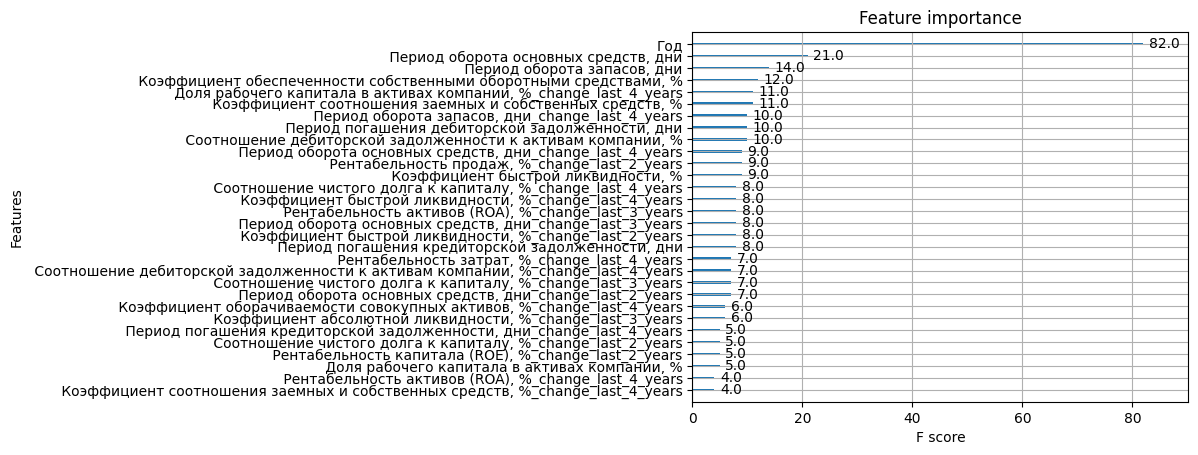

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

from matplotlib import pyplot as plt
import xgboost as xgb


xgb_params = {
    "max_depth": 4,
    "n_estimators": 1200,
    "learning_rate": 0.09479924808897194,
    "subsample": 1,
    "gamma": 0.4756674273309772,
    "min_child_weight": 0.23357425487768094,
    "max_delta_step": 0.7274545805862332,
    "colsample_bytree": 0.9893220571413148,
    "reg_alpha": 0.674401793402349,
    "reg_lambda": 0.4832264465328138,
    "scale_pos_weight": 1.1956253627044895
}

# Обучите модель XGBRegressor
xgb_regressor = xgb.XGBRegressor(**xgb_params)
xgb_regressor.fit(X_train, y_train)

# Сделайте предсказания на тестовом наборе
y_pred_xgb = xgb_regressor.predict(X_test)

# Вычислите метрики для XGBRegressor

print("Metrics for XGBoost:")
# Вычисление MAE
mae = mean_absolute_error(y_test, y_pred_xgb)
print(f"MAE: {mae}")

# Вычисление RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"RMSE: {rmse}")

# Вычисление R^2
r2 = r2_score(y_test, y_pred_xgb)
print(f"R^2: {r2}")
# Plot feature importance
xgb.plot_importance(xgb_regressor, max_num_features=30)
plt.show()




Metrics for XGBoost:
MAE: 0.16451877355575562
RMSE: 0.27886662989853334
R^2: 0.32529411316718126

In [9]:
# Вычислите метрики для XGBClassifier
from sklearn.metrics import classification_report

# Округлите каждый элемент массива y_pred_xgb
y_pred_rounded = [round(pred) for pred in y_pred_xgb]

# Вычислите метрики классификации
classification_metrics = classification_report(y_test, y_pred_rounded)

print("Metrics for XGBoost:")
print(classification_metrics)


Metrics for XGBoost:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      1435
        True       0.76      0.52      0.62       220

    accuracy                           0.91      1655
   macro avg       0.85      0.75      0.79      1655
weighted avg       0.91      0.91      0.91      1655

